# CREDIT CARD FRAUD DETECTION

## Problem Statement:
#### The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

csvfile https://drive.google.com/file/d/1FPRdjjzHyrBGAW6bQaKj2GVeIqMhtH17/view?usp=sharing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#to extract the columns in the data set
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
#checking for null
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#checking for null
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#knowing data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
#information of the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

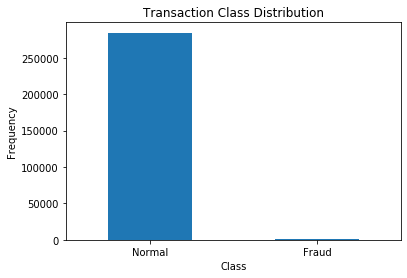

In [8]:
#visualizing the transactions
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

#### The above plot shows that there are very less no of fraud transactions for more number of normal i.e. for valid transactions.

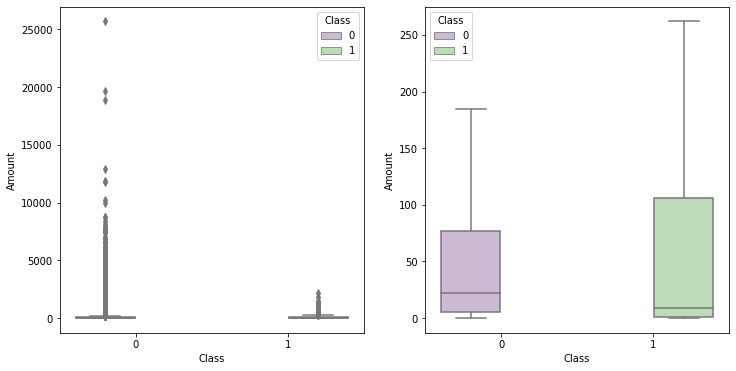

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sb.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sb.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

#### We can see a slightly difference in log amount of our two Classes.The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

In [10]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [11]:
#Fraud data
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
#NOrmal data
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

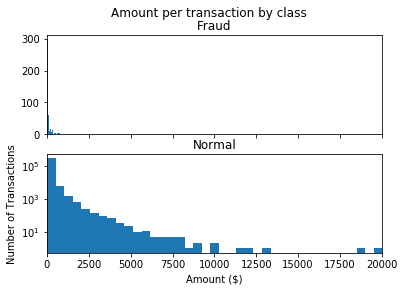

In [13]:
#Ploting the amount per transactions by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

#### From the above plots we can say that normal transactions are more in number and they are large transactions.

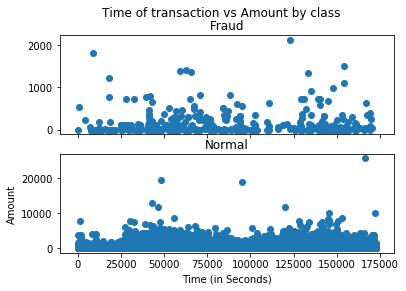

In [14]:
#Transactions based on time 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#### From the above scatterplot we can say that most of the fraud transactions were under the amount of 2000 where the normal transactions were present irrespective of amount.

<Figure size 432x288 with 0 Axes>

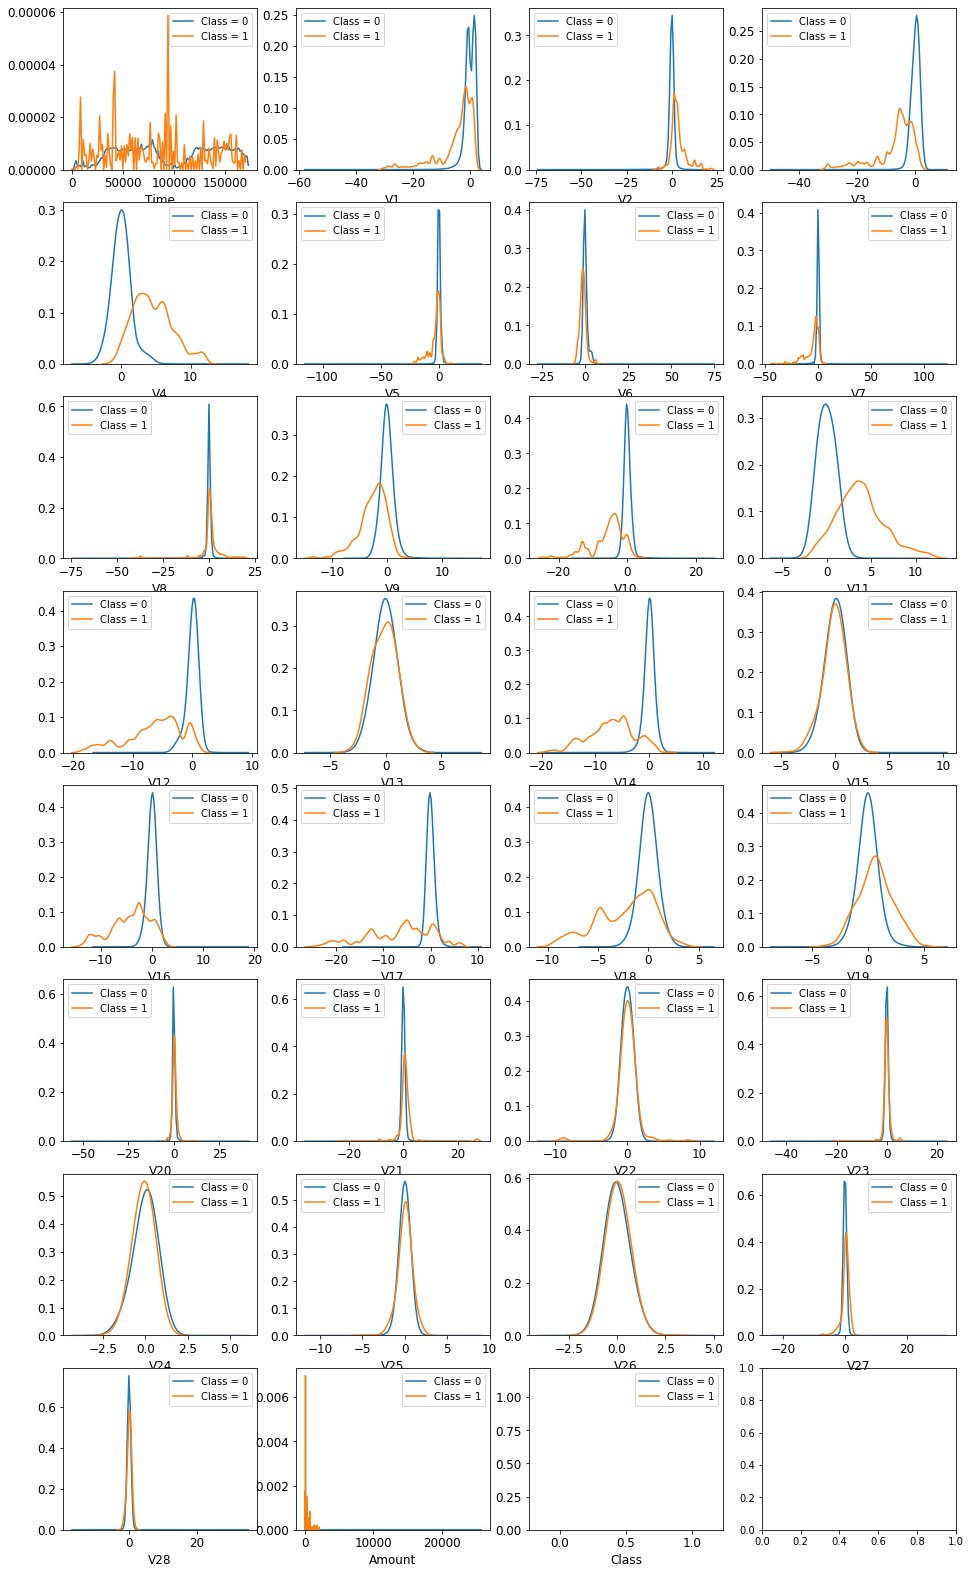

In [15]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sb.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sb.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

##### For some of the features we can observe a good selectivity in terms of distribution for the values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

In [16]:
# Data Partition
X=df.drop(labels='Class', axis = 1)
y= df.loc[:, 'Class']
#del df
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

V17       0.008044
V14       0.007871
V12       0.007212
V10       0.007191
V11       0.006368
V16       0.005752
V4        0.004645
V3        0.004542
V18       0.003858
V9        0.003745
V7        0.003720
V2        0.002930
V27       0.002209
V21       0.002197
V5        0.002153
V6        0.002095
V8        0.001819
V1        0.001787
Time      0.001650
V28       0.001647
Amount    0.001299
V19       0.001260
V20       0.000939
V23       0.000808
V24       0.000557
V26       0.000487
V22       0.000376
V25       0.000301
V13       0.000183
V15       0.000156
dtype: float64

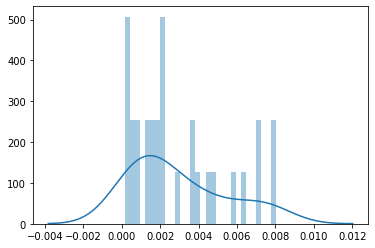

In [17]:
#Mutual information:

from sklearn.feature_selection import mutual_info_classif

mutual_infos = pd.Series(data= mutual_info_classif(X_train, y_train, discrete_features= False, random_state=1), index=X_train.columns)
sb.distplot(mutual_infos.sort_values(ascending=False), bins=30, label=X_train)
mutual_infos.sort_values(ascending=False)

#### This shows that the most important features are v17,v14,v12,v10,v11

### Balancing the imbalanced data

### SMOTE

In [18]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=120)
X,y=smk.fit_sample(df.drop(['Class'],axis=1),df['Class'])

In [19]:
y.value_counts()

1    283765
0    283765
Name: Class, dtype: int64

## Model building

## LOGISTIC REGRESSION

In [20]:
#LOGISTIC REGRESSION:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=False)
m1=log.fit(X_train, y_train)
 



In [21]:
#Predicting the training data
y_pred=log.predict(X_train)
y_train==y_pred

105644    True
139790    True
158758    True
130845    True
88908     True
          ... 
62122     True
249626    True
188363    True
224660    True
206178    True
Name: Class, Length: 199364, dtype: bool

In [22]:
#Predicting test data
y_pred=log.predict(X_test)
y_test==y_pred

31773     True
117430    True
274383    True
216704    True
245854    True
          ... 
77982     True
148012    True
241018    True
112976    True
171570    True
Name: Class, Length: 85443, dtype: bool

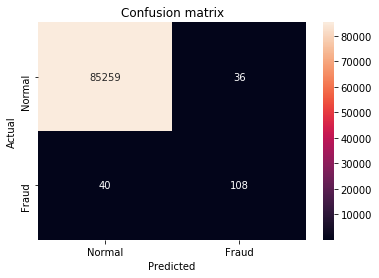

In [23]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
sb.heatmap(conf_matrix, xticklabels = LABELS, 
           yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('Actual') 
plt.xlabel('Predicted') 
plt.show() 


In [24]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
target_names=['Real', 'Fraud']
class_report = classification_report(y_test, y_pred, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

        Real       1.00      1.00      1.00     85295
       Fraud       0.75      0.73      0.74       148

    accuracy                           1.00     85443
   macro avg       0.87      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
#To plot roc curve and find accuracy
from sklearn.metrics import roc_auc_score,roc_curve
prob=m1.predict_proba(X_test)[:,1]
fp1,tp1,threshold1=roc_curve(y_test,prob)

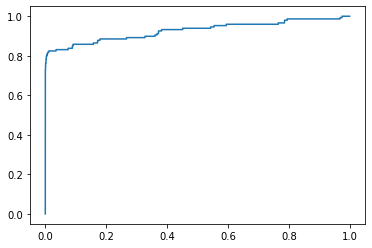

In [26]:
plt.plot(fp1,tp1)

In [27]:
roc_auc_score(y_test,prob)

0.9271235125153878

## RANDOM FOREST

In [28]:
xData = X.values 
yData = y.values 

In [29]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_train,X_test,y_train,y_test = train_test_split( 
       xData,yData,test_size = 0.2,random_state = 42) 
 

In [30]:
 # Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
m2=rfc.fit(X_train, y_train) 
# predictions 
yPred = rfc.predict(X_train) 


In [31]:
#Predicting the training data
yPred=rfc.predict(X_train)
y_train==yPred

array([ True,  True,  True, ...,  True,  True,  True])

In [32]:
#Predicting test data
yPred=rfc.predict(X_test)
y_test==yPred

array([ True,  True,  True, ...,  True,  True,  True])

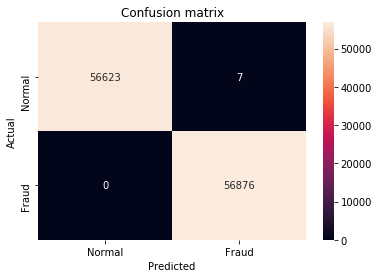

In [33]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, yPred) 
sb.heatmap(conf_matrix, xticklabels = LABELS, 
           yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('Actual') 
plt.xlabel('Predicted') 
plt.show() 


In [34]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
target_names=['Real', 'Fraud']
class_report = classification_report(y_test, yPred, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

        Real       1.00      1.00      1.00     56630
       Fraud       1.00      1.00      1.00     56876

    accuracy                           1.00    113506
   macro avg       1.00      1.00      1.00    113506
weighted avg       1.00      1.00      1.00    113506



In [39]:
#To plot roc curve and find accuracy
from sklearn.metrics import roc_auc_score
prob1=m2.predict_proba(X_test)[:,1]
fp2,tp2,threshold2=roc_curve(y_test,prob1)

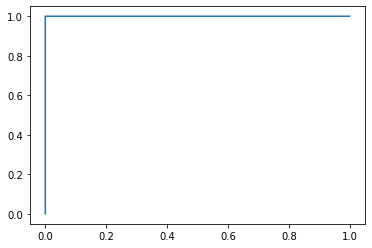

In [40]:
plt.plot(fp2,tp2)

In [41]:
roc_auc_score(y_test,prob1)

0.999999139212508

### EVALUATION OF BEST MODEL

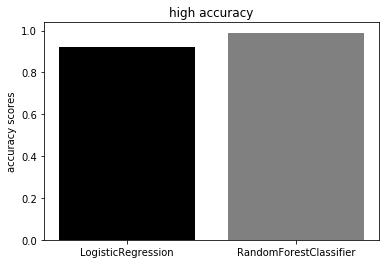

In [38]:
models=['LogisticRegression','RandomForestClassifier']
acc_scores=[0.92,0.99]
plt.bar(models,acc_scores,color=['black','grey'])
plt.ylabel("accuracy scores")
plt.title("high accuracy")
plt.show()

### CONCLUSION
#### The best model is the RANDOM FOREST CLASSIFIER with high accuracy of 99% over LogisticRegression with accuracy of 92%